You are given a dataset where each data point has one feature x and one target varibale y. The relationship between x and y is linear, and can be expressed as : $$ y = 2x + 3 $$ 
Your task is to build a neural network that can learn this relationship. That is, given a new x value, your model should be able to predict the corresponding y value.

In [56]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
X = torch.arange(1,21)
y = 2*X + 3

RANDOME_SEED = 42
torch.manual_seed(RANDOME_SEED)

In [3]:
# Train test split ratio... 80/20
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=RANDOME_SEED )

In [ ]:
# Visualization with matplotlib
def visualization(training_data = X_train,
                training_label =  y_train,
                testing_data =  X_test,
                testing_label =  y_test,
                pred = None) :
    
    plt.figure(figsize = (16,7.5))

    plt.plot(X_train,y_train, c = "r", label = "Training data")
    plt.plot(X_test,y_test, c = "g", label = "Test data")

    if pred is not None : 
        plt.plot(X_test,pred, c = "b", label = "Prediction")
    
    plt.legend()

In [16]:
# model class for linear regression
class LinearRegression(nn.Module) :
    def __init__(self) :
        super().__init__()   
        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad=True, 
                                                dtype=torch.float)
                                                )
        self.bias = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float)
                                                )
    def forward(self, X) :
        return self.weights * X + self.bias

In [17]:
model = LinearRegression()
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr = 0.001)

In [28]:
# Trainning loop [1]
epochs = 1000

for epoch in range(epochs) :
    model.train()
    y_pred = model(X_train)
    loss = loss_function(y_pred,y_train.float())
    optimizer.zero_grad()  
    loss.backward()        
    optimizer.step()

In [37]:
# Testing code 
model.eval()
with torch.inference_mode() :
    test_pred = model(X_test)
    test_loss = loss_function(test_pred,y_test)

In [47]:
model.state_dict()

OrderedDict([('weights', tensor([2.0000])), ('bias', tensor([2.9996]))])

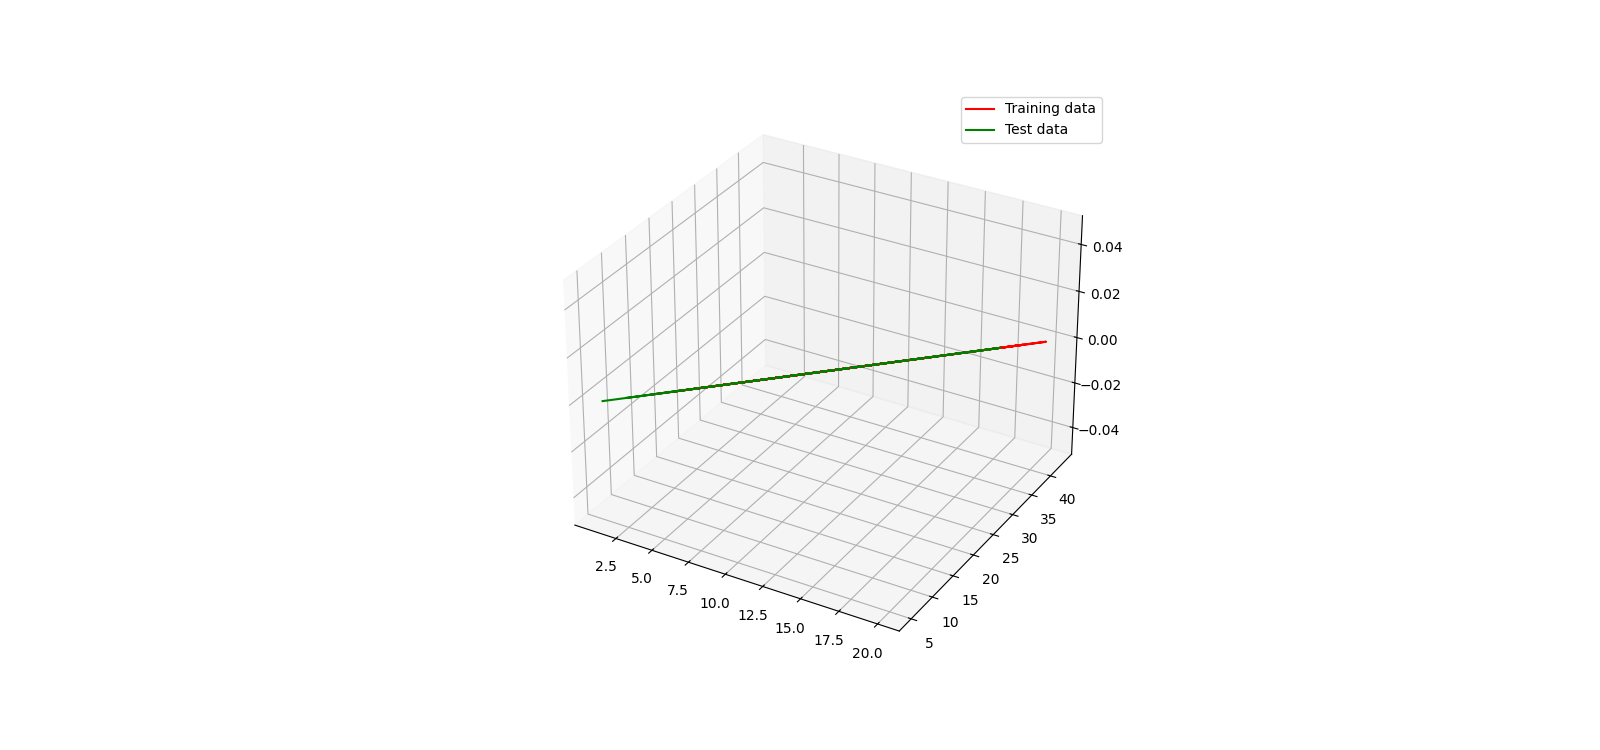

In [ ]:
visualization(pred = None)

[1]  Our Trainning loop worflow
* Epochs
* Loop
  * Model Initialization
  * Inference
  * Loss function implementation
  * Zeroing the Gradient via optimizer.zero_grad()
  * Backpropagation
  * Parameters update via optimizer.step()


I got a ValueError when trying to evaluate the thruth value of **ypred** (the prediction of y).
In the Visualization function, I wrote : <br>``if not pred == None`` , That return a ValueError since in Python, we cannot evaluate the truth of an array because it's unclear what should be considered truth or false when an array has multiple elements. <br>``if pred is not None`` is the way to gooooooo ! haha